<a href="https://colab.research.google.com/github/MuayThaiLegz/machineleanrning-/blob/main/CookingWithAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the first Colab notebook following along with the book Aitificail Inteliligenece with Py Cookbook.

I have read the book and will use it plus the github repo to aid my explorations.
I intend to add a layer of indivuduality anywhere I can.


In [5]:
#!pip install scikit-learn==0.22  # we'll need at least sklearn version 0.22
#!pip install tensorflow>=2.0.0  # and we'll use tensorflow version 2.0


In [6]:
#!pip install swifter tqdm ray joblib jax jaxlib seaborn numba cython

In [1]:
#!pip install iPython-autotime

In [2]:
%load_ext autotime

time: 2.58 ms (started: 2023-03-05 02:05:18 +00:00)


In [10]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython
time: 2.38 ms (started: 2023-03-05 02:06:16 +00:00)


In [11]:
%%cython


time: 1.77 ms (started: 2023-03-05 02:06:19 +00:00)


UsageError: %%cython is a cell magic, but the cell body is empty.


In [13]:
from tqdm.notebook import trange, tqdm
tqdm.pandas()


time: 1.56 ms (started: 2023-03-05 02:06:22 +00:00)


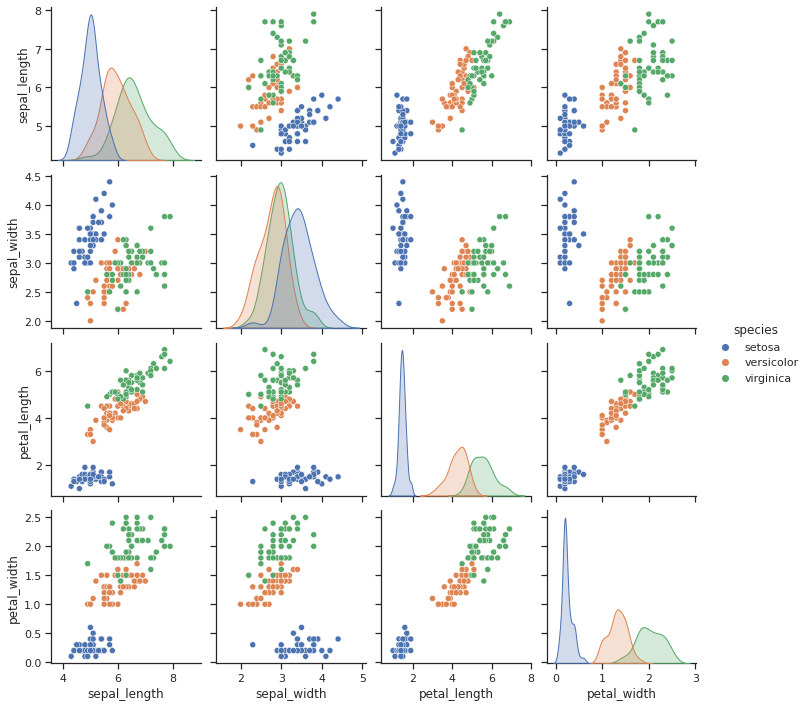

time: 14.3 s (started: 2023-03-05 01:34:36 +00:00)


In [54]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# one of the conveniences that it is such a well-known dataset is that we can easily load it from many packages.
iris = sns.load_dataset('iris')
# 
g = sns.pairplot(iris, hue='species')

In [55]:

# just for illustration purposes
classes = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
X = iris[['sepal_length', 'sepal_width',	'petal_length',	'petal_width']].values
y = iris['species'].apply(lambda x: classes[x]).values

time: 20.7 ms (started: 2023-03-05 01:35:35 +00:00)


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0
)

params = dict(
    max_depth=20,
    random_state=0,
    n_estimators=100,
)
clf = RandomForestClassifier(**params)

# for training we use the fit method available for all sklearn-compatible models
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

time: 542 ms (started: 2023-03-05 01:45:06 +00:00)


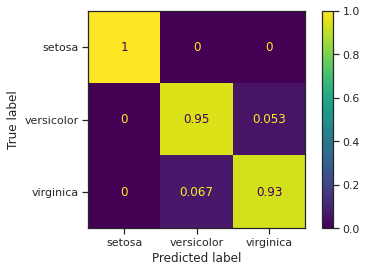

time: 480 ms (started: 2023-03-05 01:45:21 +00:00)


In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(
    clf, X_test, y_test,
    display_labels=['setosa', 'versicolor', 'virginica'],
    normalize='true'
)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


def create_iris_model():
    '''
    Create the iris classification model
    '''
    iris_model = Sequential()
    iris_model.add(Dense(10, activation='selu', input_dim=4))
    iris_model.add(Dense(3, activation='softmax'))
    iris_model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    iris_model.summary()
    return iris_model

iris_model = create_iris_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
time: 7.14 s (started: 2023-03-05 01:45:41 +00:00)


In [ ]:
dot = tf.keras.utils.model_to_dot(
    iris_model,
    show_shapes=True,
    
)

In [62]:
y_categorical = tf.keras.utils.to_categorical(y, 3)

# For a neural network, we should also have standardized inputs, preferably with mean 0 and standard deviation 1.
X = (X - X.mean(axis=0)) / X.std(axis=0)

time: 2.51 ms (started: 2023-03-05 01:46:23 +00:00)


In [66]:
X_train, X_test, train, test = train_test_split(
    X, y_categorical, test_size=0.30, random_state=0
)

X_train, X_test, train, test = train_test_split(train, test)

time: 2.34 ms (started: 2023-03-05 01:48:46 +00:00)


In [67]:
iris_model.fit(x=X_train, y=y_train, epochs=150)

Epoch 1/150
4/4 [==============================] - 1s 5ms/step - loss: 0.6178 - accuracy: 0.6400
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.6700
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6700
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.6900
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.5490 - accuracy: 0.6900
Epoch 6/150
4/4 [==============================] - 0s 7ms/step - loss: 0.5393 - accuracy: 0.7000
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.7200
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.7500
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.5090 - accuracy: 0.7500
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7500
Epoch 11/150
4/4 [===========

time: 6.57 s (started: 2023-03-05 01:49:02 +00:00)


In [68]:


class SklearnWrapper:
  _estimator_type = 'classifier'
  def __init__(self, model, classes_):
    self.model = model
    self.classes_ = classes_
    
  def predict(self, data):
    result = self.model.predict(data).argmax(axis=1)
    return result

model_wrapper = SklearnWrapper(iris_model, ['setosa', 'versicolor', 'virginica'])


time: 2.2 ms (started: 2023-03-05 01:50:02 +00:00)


2/2 [==============================] - 0s 6ms/step


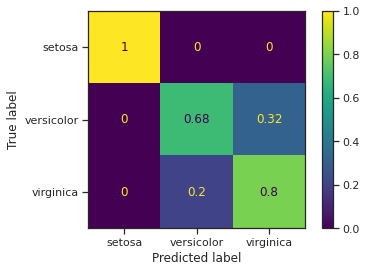

time: 784 ms (started: 2023-03-05 01:50:24 +00:00)


In [69]:
plot_confusion_matrix(
    model_wrapper, X_test, y_test.argmax(axis=1),
    display_labels=['setosa', 'versicolor', 'virginica'],
    normalize='true'
)

In [14]:
# PYTORCH

time: 648 µs (started: 2023-03-05 02:08:13 +00:00)


In [82]:
import torch
import torch.nn as nn
from torch.autograd import Variable


iris_model = torch.nn.Sequential(
  nn.Linear(4, 10),  # equivalent to Dense in keras
  nn.SELU(),
  nn.Linear(10, 3),
  nn.Softmax(dim=1)
)




time: 5.65 ms (started: 2023-03-05 02:04:28 +00:00)


In [83]:


X_train = Variable(torch.Tensor(X_train).float())
y_train = Variable(torch.Tensor(y_train.argmax(axis=1)).long())
X_test = Variable(torch.Tensor(X_test).float())
y_test = Variable(torch.Tensor(y_test.argmax(axis=1)).long())

IndexError: ignored

time: 137 ms (started: 2023-03-05 02:04:30 +00:00)


time: 1.44 s (started: 2023-03-05 02:04:12 +00:00)


In [72]:
criterion = torch.nn.CrossEntropyLoss()  # cross entropy loss
optimizer = torch.optim.RMSprop(iris_model.parameters(), lr=0.01)

time: 1.93 ms (started: 2023-03-05 01:52:07 +00:00)


In [77]:
for epoch in trange(100):
    optimizer.zero_grad()
    out = iris_model(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('number of epoch', epoch, 'loss', loss)

  0%|          | 0/100 [00:00<?, ?it/s]

number of epoch 0 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
number of epoch 10 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
number of epoch 20 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
number of epoch 30 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
number of epoch 40 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
number of epoch 50 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
number of epoch 60 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
number of epoch 70 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
number of epoch 80 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
number of epoch 90 loss tensor(0.5515, grad_fn=<NllLossBackward0>)
time: 364 ms (started: 2023-03-05 02:03:03 +00:00)


In [78]:
class SklearnTorchWrapper:
  _estimator_type = 'classifier'
  def __init__(self, model, classes_):
    self.model = model
    self.classes_ = classes_
    
  def predict(self, data):
    _, result = torch.max(self.model(data), 1)
    return result

model_wrapper = SklearnTorchWrapper(iris_model, ['setosa', 'versicolor', 'virginica'])


time: 1.97 ms (started: 2023-03-05 02:03:10 +00:00)


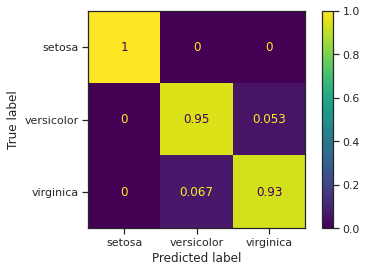

time: 303 ms (started: 2023-03-05 02:03:12 +00:00)


In [79]:
plot_confusion_matrix(
    model_wrapper, X_test, y_test,
    display_labels=['setosa', 'versicolor', 'virginica'],
    normalize='true'
)

In [17]:
#!wget https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
import pandas as pd
date_cols = [
    'compas_screening_date', 'c_offense_date',
    'c_arrest_date', 'r_offense_date', 
    'vr_offense_date', 'screening_date',
    'v_screening_date', 'c_jail_in',
    'c_jail_out', 'dob', 'in_custody', 
    'out_custody'
]
data = pd.read_csv(
    'compas-scores-two-years.csv',
    parse_dates=date_cols
)


time: 443 ms (started: 2023-03-05 02:25:43 +00:00)


In [18]:
data

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaT,NaT,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaT,NaT,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


time: 67.1 ms (started: 2023-03-05 02:25:47 +00:00)


In [ ]:

import numpy as np

def mse(preds, targers):
  return np.sum((pred))
  

--2023-03-05 02:30:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.1’

adult.data.1        100%[===================>]   3.79M  6.83MB/s    in 0.6s    

2023-03-05 02:30:29 (6.83 MB/s) - ‘adult.data.1’ saved [3974305/3974305]

time: 1.03 s (started: 2023-03-05 02:30:28 +00:00)
